In [154]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [155]:
covid_data = pd.read_csv("/home/nadzhou/Downloads/covid_data.csv")

In [156]:
pk_covid_data = covid_data.loc[covid_data.Country_Region == "Pakistan"]

In [157]:
def encode_data(covid_data): 
    label_encoder = LabelEncoder()
    covid_data.Date = label_encoder.fit_transform(covid_data.Date)
    covid_data.Fatalities = np.sqrt(covid_data.Fatalities)
    
    return covid_data

In [158]:
def drop_region_id_cols(covid_data): 
    covid_data.drop("Province_State", 1, inplace=True)
    covid_data.drop("Id", 1, inplace=True)
    
    return covid_data

In [159]:
pk_covid_data = encode_data(pk_covid_data)
pk_covid_data = drop_region_id_cols(pk_covid_data)

/home/nadzhou/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/nadzhou/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [160]:
pk_covid_data.shape

(115, 4)

In [161]:
pk_covid_data.head()

,Country_Region,Date,ConfirmedCases,Fatalities
22310,Pakistan,0,0.0,0.0
22311,Pakistan,1,0.0,0.0
22312,Pakistan,2,0.0,0.0
22313,Pakistan,3,0.0,0.0
22314,Pakistan,4,0.0,0.0


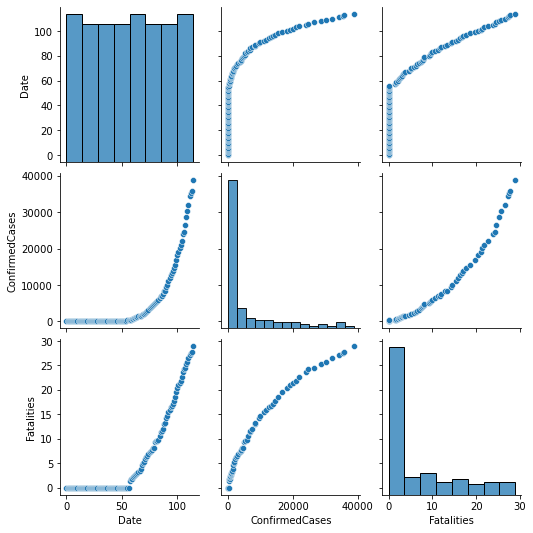

In [162]:
sns.pairplot(pk_covid_data)

In [163]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

predictors = ["Date", "ConfirmedCases"]
outcome = "Fatalities"

x_train, x_test, y_train, y_test = train_test_split(pk_covid_data[predictors], pk_covid_data[outcome], test_size=0.2, random_state=42)

multi_linear_model = LinearRegression()
multi_linear_model.fit(x_train, y_train)

y_pred = multi_linear_model.predict(x_test)


<AxesSubplot:>

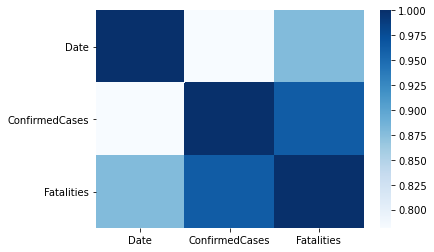

In [164]:
correlation_matrix = pk_covid_data.corr()
sns.heatmap(correlation_matrix, cmap="Blues")

R squared value: 0.9675712851852836
Mean squared error value: 2.86083086505211


/home/nadzhou/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fatalities'>

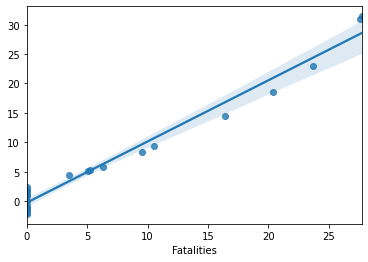

In [165]:
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R squared value: {r_squared}")
print(f"Mean squared error value: {mse}")

sns.regplot(y_test, y_pred)

/home/nadzhou/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/nadzhou/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ConfirmedCases'>

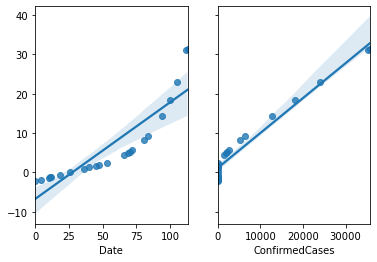

In [167]:

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.regplot(x_test.Date, y_pred, ax=ax1)
sns.regplot(x_test.ConfirmedCases, y_pred,  ax=ax2)